In [1]:
# Thư viện
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read file 
df = pd.read_csv('CSGO_Market.csv')

### Thông tin về dữ liệu 

Mỗi dòng có ý nghĩa gì ? 

- Dữ liệu ở mỗi dòng thể hiện một đối tượng có đầy đủ các thuộc tính như Tên , Loại skin , Độ bền , Độ hiếm , Extra , Số lượng bán ra trung bình trên ngày , Gía ( trung bình ) , Giá ( cao nhất ) , Số ngày giữ giá cao nhất , Gía thấp nhất , Số ngày giữ giá thấp nhất , % Thay đổi giá , Thời gian xuất hiện trên market .

Mỗi cột có ý nghĩa gì?

    Name  : object - Thể hiện tên của skin 
    Type  : object - Loại skin thu thập là gì 
    Exterior  : object - Độ bền của skin 
    Rarity  : object - Độ hiếm của skin đó 
    Extra  : object - Phân loại đặc điểm skin 
    Average volume sale  : float64 - Số lượng bán ra trung bình trong 1 ngày 
    Average price (VND)  : float64 - Giá tiền trung bình mà skin đó bán ra 
    Max price (VND)  : float64 - Giá tiền cao nhất mà skin đó bán ra 
    Days to reach max  : int64 - Số ngày skin đó giữ giá cao nhất 
    Min price (VND)  : float64 - Giá tiền thấp nhất mà skin đó bán ra 
    Days to reach min  : int64 - Số ngày skin đó giữ giá thấp nhất 
    Price change (%)  : float64 - Tỉ lệ thay đổi giá của skin 
    Time on market (days)  : int64 -Số ngày skin đã xuất hiện trên market 

- Kiểu phân bố dữ liệu ở mỗi cột là ngẫu nhiên không theo tỉ lệ ! và không có chiều hướng tăng hay giảm 



In [33]:
# Kiểu dữ liệu của từng cột 
for i in df.columns:
    print(i ," :",df[i].dtypes)

Name  : object
Type  : object
Exterior  : object
Rarity  : object
Extra  : object
Average volume sale  : float64
Average price (VND)  : float64
Max price (VND)  : float64
Days to reach max  : int64
Min price (VND)  : float64
Days to reach min  : int64
Price change (%)  : float64
Time on market (days)  : int64


### 1. Type nào được đăng bán nhiều nhất trên market 

Nhầm để hiểu hơn về market đang được giao dịch đăng bán nhiều nhất ở kiểu nào của skin 
- Về mặt Type , khi biết market đang có những Type nào được bán nhiều , có thể từ đó khai thác các skin tiềm năng mà người  chơi đang sở hữu 

- Nguồn đặt câu hỏi ( tự nghĩ ra )



Text(0.5, 1.0, 'Thống kê loại vật phẩm được bán trên market')

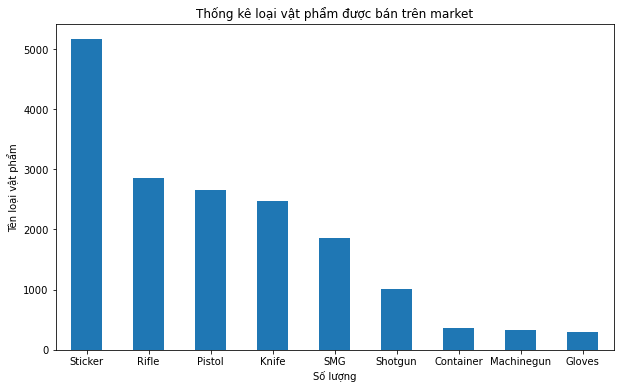

In [3]:
#draw 
df = df.loc[df['Type']!= 'Others']
df_Type = df['Type'].value_counts(dropna=False)# get dict _ of Type 

plt.rcParams["figure.figsize"] = [10, 6]
ax = df_Type.plot.bar(rot=0)
plt.ylabel('Tên loại vật phẩm')
plt.xlabel('Số lượng') 
plt.title('Thống kê loại vật phẩm được bán trên market')

#### Nhận xét :

Sticker là vật phẩm được giao dịch nhiều nhất trên market , cùng với đó là Rifle , Pistol , Knife . Tuy nhiên Sticker chiếm đa số với hơn 5000 giao dịch 
Vậy khi bạn đang sở hữu Sticker tức là bạn đang có những cơ hội lớn để tham gia vào market và thu lại lợi nhuận từ việc bán chúng 
Tuy nhiên , Sticker cũng như các Type khác , chúng có nhiều phân loại về độ hiếm cũng như Extra đặc biệt , và nó cũng là một trong những điểm đánh giá xem Sticker của bạn đang sở hữu có đang là nhu cầu của người mua hay không ? 

Để biết được điều đó , ta cần thống kê giữa Type và Extra 

### 2. Type có skin Extra nào thì được bán nhiều nhất ?
- Extra được chia thành 3 loại 'Souvenir' , 'StatTrak™' , 'Normal' , biết được đặc điểm này , chúng ta sẽ chia dữ liệu của Type theo 3 loại này . Từ đó thống kê ra các thông số xem thị trường thích nhất loại skin có đặc điểm nào ! 
- Nguồn đặt câu hỏi ( tự nghĩ ra )

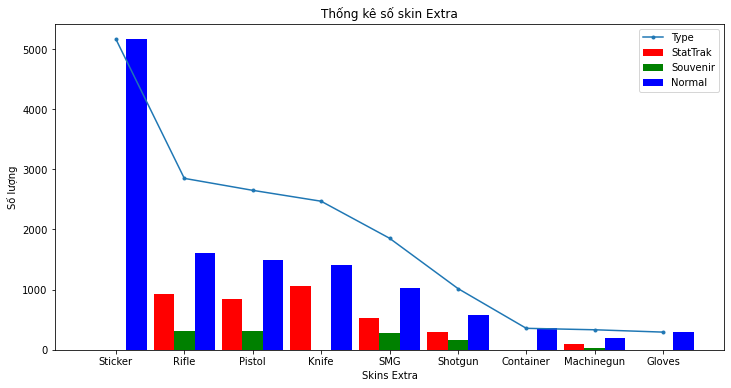

In [4]:
plt.rcParams["figure.figsize"] = [12, 6]
df_Type.plot.line(marker ='.')

X = list(df_Type.keys())
list_Extra = ['Souvenir','StatTrak™','Normal']
list_Souvenir = []
list_Stattrak = []
list_Normal = []
for i in X:
    a = df.loc[df['Type'] == i]
    temp = a['Extra'].value_counts(dropna=False) # count value in columns Extra 
    if ('StatTrak™' in list(temp.keys())):
        list_Stattrak.append(temp['StatTrak™']) # sum value = Stattrak in column 
    else:
        list_Stattrak.append(0)
        
    if ('Souvenir' in list(temp.keys())):
        list_Souvenir.append(temp['Souvenir'])
    else:
        list_Souvenir.append(0)
        
    if ('Normal' in list(temp.keys())):
        list_Normal.append(temp['Normal'])
    else: 
        list_Normal.append(0)


X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3, list_Stattrak, 0.3, label = 'StatTrak',color = 'r')
plt.bar(X_axis , list_Souvenir, 0.3, label = 'Souvenir',color ='g')
plt.bar(X_axis + 0.3, list_Normal, 0.3, label = 'Normal',color = 'b')
  
plt.xticks(X_axis, X)
plt.xlabel("Skins Extra")
plt.ylabel("Số lượng")
plt.title("Thống kê số skin Extra")
plt.legend()

#### Nhận xét : 
- Có thể thấy skin Normal xuất hiện nhiều trên Market , chiếm tỉ lệ cao nhất trong từng "Type" 
- Cho thấy skin Normal dễ kiếm hơn so với StatTrak và Souvenir . Trong đó Souvenir là ít xuất hiện nhất ! 
- Skin Souvenir ít xuất hiện do chỉ có trong các event , vậy liệu nó có được người mua chú ý hay có hiếm trên thị trường không ? 

### 3. Liệu skin Souvenir có nhận được sự quan tâm hơn so với các skin khác không ?!

- Điều đó sẽ trả lời xem skin Souvenir có thực sự được ưa chuộng trong market 
- Nguồn đặt câu hỏi ( tự nghĩ ra )

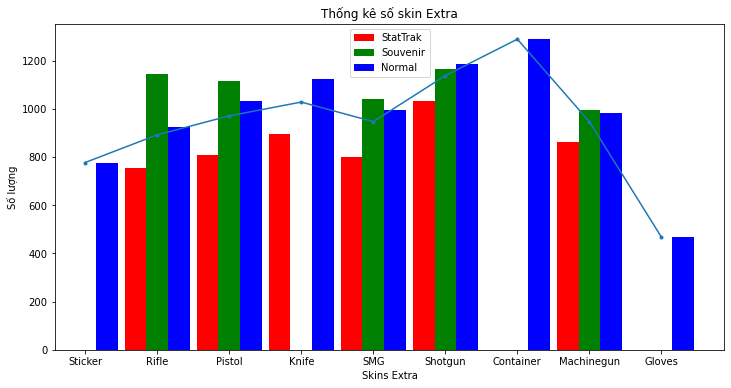

In [5]:
plt.rcParams["figure.figsize"] = [12, 6]

X = list(df_Type.keys())
list_Extra = ['Souvenir','StatTrak™','Normal']
list_Souvenir = []
list_Stattrak = []
list_Normal = []
list_max = {} 
for i in X:
    a = df.loc[df['Type'] == i]
    list_max[i]=(a['Days to reach max'].mean())
    
    Extra = a.loc[a['Extra'] == 'Souvenir']
    list_Souvenir.append(Extra['Days to reach max'].mean())
    
    Extra1 = a.loc[a['Extra'] == 'StatTrak™']
    list_Stattrak.append(Extra1['Days to reach max'].mean())
    
    Extra2 = a.loc[a['Extra'] == 'Normal']
    list_Normal.append(Extra2['Days to reach max'].mean())



plt.plot(list(list_max.keys()), (list_max.values()),marker ='.')

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3, list_Stattrak, 0.3, label = 'StatTrak',color = 'r')
plt.bar(X_axis , list_Souvenir, 0.3, label = 'Souvenir',color ='g')
plt.bar(X_axis + 0.3, list_Normal, 0.3, label = 'Normal',color = 'b')
  
plt.xticks(X_axis, X)
plt.xlabel("Skins Extra")
plt.ylabel("Số lượng")
plt.title("Thống kê số skin Extra")
plt.legend()


#### Nhận xét :

Giá của các vật phẩm Souvenir luôn cao và giữ được mức giá cao so với các Extra khác ngoài trừ Normal vì số lượng quá phổ biến 
Chứng tỏ các vật phẩm Souvenir được người dùng thích và là Extra hiếm có trong game 

Bên cạnh đó thì StatTrak™ khá thấp , thấp nhất trong các Extra , cho thấy nó khá kén người thích ! 

### 4. Bây giờ vấn đề quan tâm của chúng ta là độ hiếm , có phải các vật phẩm xuất hiện trên market thì đa phần rất hiếm và rất khó tìm ? 

- Nguồn đặt câu hỏi ( tự nghĩ ra )

Text(0.5, 1.0, 'Thống kê độ hiếm của loại vật phẩm được bán trên market')

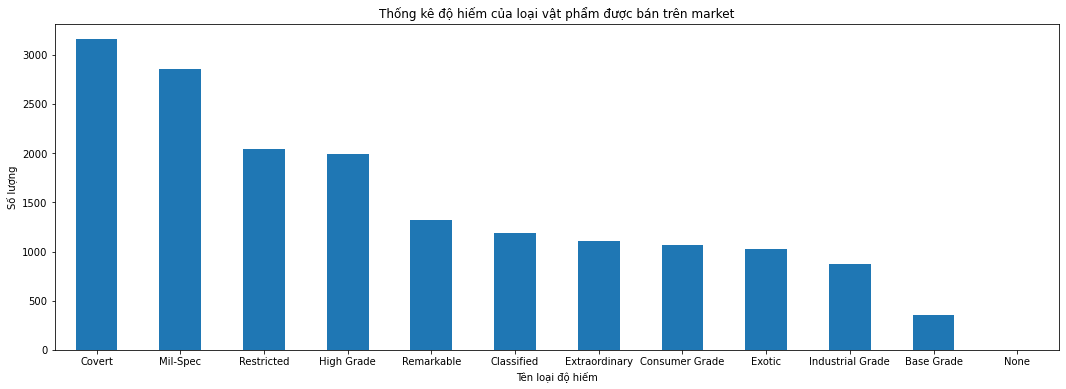

In [6]:
df_Rarity = df['Rarity'].value_counts(dropna=False)# get dict _ of Type 

plt.rcParams["figure.figsize"] = [18, 6]
ax = df_Rarity.plot.bar(rot=0)
plt.xlabel('Tên loại độ hiếm')
plt.ylabel('Số lượng') 
plt.title('Thống kê độ hiếm của loại vật phẩm được bán trên market')

#### Nhận xét : 

Có thể thấy theo thống kê , các độ hiếm xuất hiện nhiều trên market là Covert , Mil-Spec , ... 
Bất ngờ là không có độ hiếm WeaPonS ( hiếm nhất ) xuất hiện trên market , có thể nó rất khó kiếm nên hầu như không có giao dịch nào hoặc có thể thị trường không ưa thích loại vật phẩm này .

Loại vật phẩm có độ hiếm Covert (khá hiếm-red) được giao dịch nhiều nhất với số lượng hơn 3000 , Mil-Spec cũng được giao dịch khá nhiều trên market 

Loại vật phẩm đại trà ( Base Grade) được giao dịch khá thấp dưới 500  

### 5. Tỉ lệ mua trong 1 ngày có phản ảnh đó là món đó "hot" không ?
- Nguồn đặt câu hỏi ( tự nghĩ ra )

#### Thống các skin bán được trong 1 ngày theo các mức thấp (1-1000) ,trung bình (1000-3000) , cao (>= 3000)

In [7]:
def volume (min_value,max_value):
    
    df_volume = df.loc[df['Average volume sale']>= min_value]
    df_volume = df.loc[df['Average volume sale']< max_value]
    
    df_volume = df_volume['Type'].value_counts()
    plt.rcParams["figure.figsize"] = [10, 6]
    ax = df_volume.plot.bar(rot=0)
    plt.ylabel('Tên loại vật phẩm')
    plt.xlabel('Số lượng') 
    plt.title('Thống kê loại vật phẩm được bán (' + str(min_value) +'-' +str(max_value) +') cái mỗi ngày trên market ')
    
    

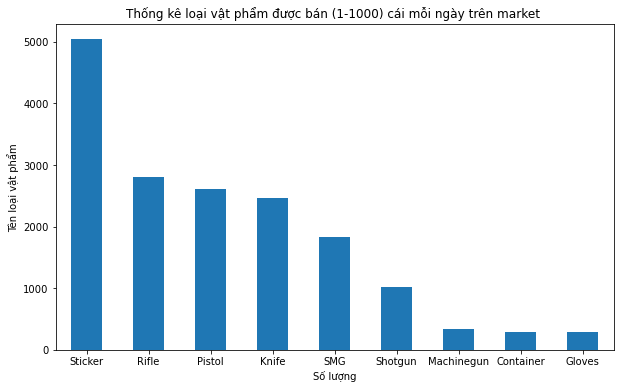

In [8]:
volume(1,1000)

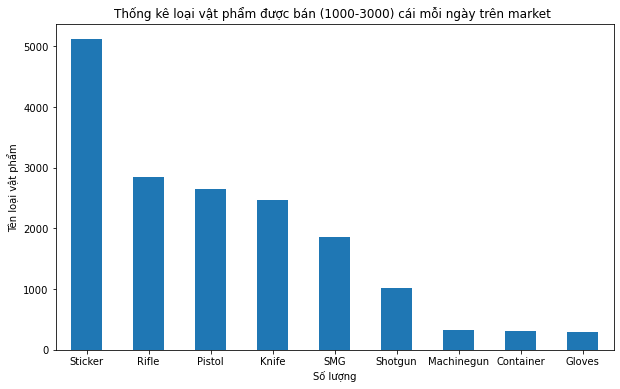

In [9]:
volume(1000,3000)

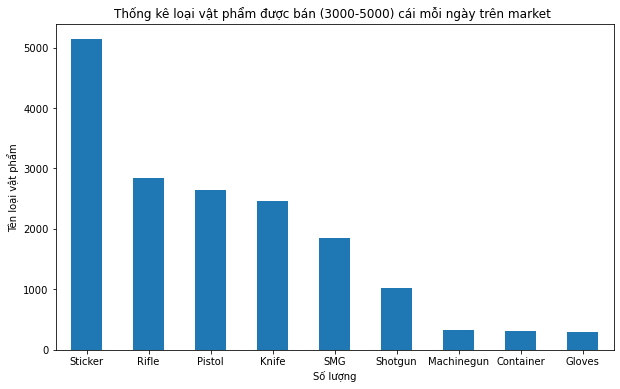

In [10]:
volume(3000,5000)

#### Nhận xét : 

Dữ liệu có xu hướng không thay đổi nhiều ở mức phân chia các giá trị theo mức bán ra hằng ngày 
Có thể thấy các skin được bán ra khá ổn định 

    Với lượt giao dịch nhiều nhất là Sticker -> Rifle -> Pistol -> Knife -> SMG -> Shotgun -> Machinegun -> Container -> Gloves 


### 6.Trường hợp tôi có một skin , tôi cần tham khảo giá trên thị trường , thì tôi cần biết giá thấp nhất cao nhất trung bình của nó 

Có được những thống kê về dữ liệu trên có thể dễ dàng đưa ra lựa chọn cho người khảo sát
- Nguồn đặt câu hỏi ( tự nghĩ ra )

In [11]:
X = ['Covert','Mil-Spec','Restricted','High Grade','Remarkable','Classified','Extraordinary',
         'Consumer Grade','Exotic','Industrial Grade','Base Grade','None']
Y = ['Normal', 'StatTrak™', 'Souvenir']
def findskin(name_Type):
    
    plt.rcParams["figure.figsize"] = [16, 6]
    list_Souvenir = []
    list_Stattrak = []
    list_Normal = []
    df_skin = df.loc[df['Type'] == name_Type]
    
    for i in X:
        df_skin2 = df_skin.loc[df_skin['Rarity'] == i]
        for j in Y:
            if (j == 'Normal'):
                df_skin1 = df_skin2.loc[df_skin2['Extra'] == j]
                list_Normal.append(df_skin1['Max price (VND)'].mean())
            if (j == 'StatTrak™'):
                df_skin1 = df_skin2.loc[df_skin2['Extra'] == j]
                list_Stattrak.append(df_skin1['Average price (VND)'].mean())
            if (j == 'Souvenir'):
                df_skin1 = df_skin2.loc[df_skin2['Extra'] == j]
                list_Souvenir.append(df_skin1['Max price (VND)'].mean())
   
    X_axis = np.arange(len(X))
    plt.bar(X_axis - 0.3, list_Stattrak, 0.3, label = 'StatTrak',color = 'r')
    plt.bar(X_axis , list_Souvenir, 0.3, label = 'Souvenir',color ='g')
    plt.bar(X_axis + 0.3, list_Normal, 0.3, label = 'Normal',color = 'b')

    plt.xticks(X_axis, X)
    plt.xlabel("Skins")
    plt.ylabel("Giá")
    plt.title("Thống kê giá tiền (max) " + name_Type)
    plt.legend()

#### Danh sách các Type skin 

In [12]:
list(df_Type.keys())

['Sticker',
 'Rifle',
 'Pistol',
 'Knife',
 'SMG',
 'Shotgun',
 'Container',
 'Machinegun',
 'Gloves']

#### Tập giá trị của Type ['Sticker','Rifle','Pistol','Knife', 'SMG', 'Shotgun','Container','Machinegun','Gloves']

### Thực hiện trực quan hóa max price của các Type

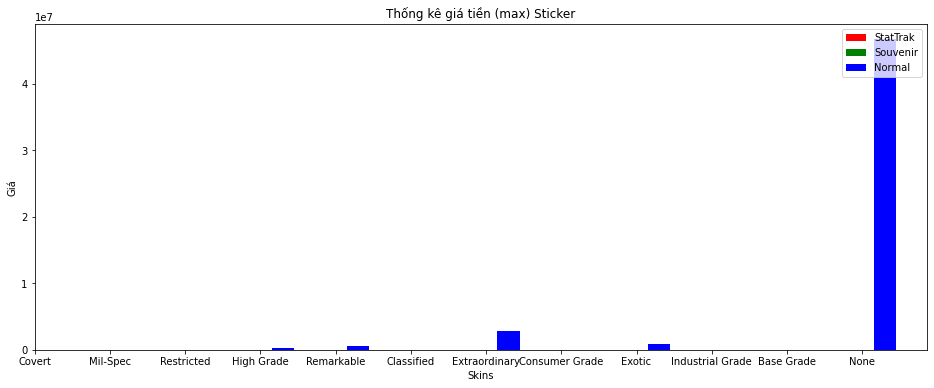

In [13]:
findskin('Sticker')

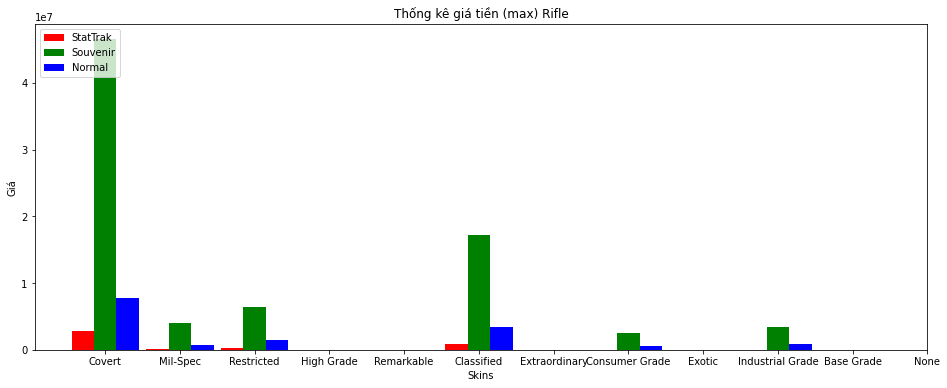

In [14]:
findskin('Rifle')

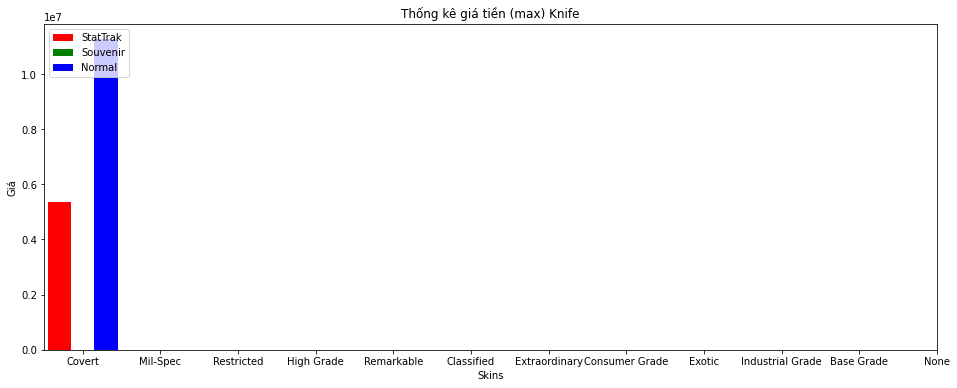

In [15]:
findskin('Knife')

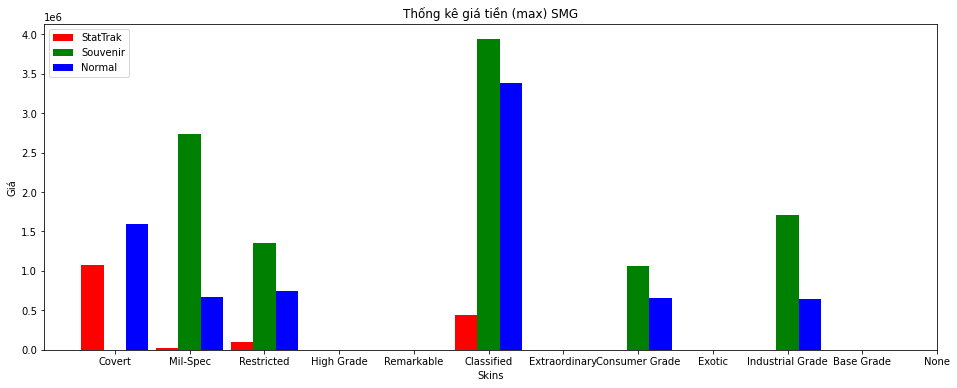

In [16]:
findskin('SMG')

#### Nhận xét :

Như có thể thấy nhờ vào trực quan hóa có thể biết Type , Rarity và Extra đang muốn tham khảo giá bán trên market 
Từ đó có thể đưa ra giá thích hợp cho Skin định bán hoặc tránh tình trạng mua nhầm giá ! 

### 7.Làm sao tôi biết mình đang sở hữu một skin có giá trị như thế nào ?
 - Sẽ phải nhìn vào thị trường trên market ưa chuộng như thế nào ? 
 - Một skin được ưa chuộng sẽ giữ được giá của nó lâu hơn ?
 - Nguồn đặt câu hỏi ( tự nghĩ ra )

### Một Skin như thế nào là được ưa chuộng , nó sẽ giữ được giá cao nhất hơn 50%


In [17]:
X = ['Covert','Mil-Spec','Restricted','High Grade','Remarkable','Classified','Extraordinary',
         'Consumer Grade','Exotic','Industrial Grade','Base Grade','None']
Y = ['Normal', 'StatTrak™', 'Souvenir']

def find_price(name_Type):
    
    plt.rcParams["figure.figsize"] = [16, 6]
    list_Souvenir = [] # max price
    list_Stattrak = []
    list_Normal = []
    list_Souvenir1 = [] # min price
    list_Stattrak1 = []
    list_Normal1 = []
    df_skin = df.loc[df['Type'] == name_Type]
    
    for i in X:
        df_skin2 = df_skin.loc[df_skin['Rarity'] == i]
        for j in Y:
            if (j == 'Normal'):
                df_skin1 = df_skin2.loc[df_skin2['Extra'] == j]
                temp = round(df_skin1['Days to reach max'].sum()*100/df_skin1['Time on market (days)'].sum(),3)
                temp1= df_skin1['Days to reach min'].sum()*100/df_skin1['Time on market (days)'].sum()
                list_Normal.append(temp)
                list_Normal1.append(temp1)
                
            if (j == 'StatTrak™'):
                df_skin1 = df_skin2.loc[df_skin2['Extra'] == j]
                temp = df_skin1['Days to reach max'].sum()*100/df_skin1['Time on market (days)'].sum() #sum_value columns reachmax
                temp1= df_skin1['Days to reach min'].sum()*100/df_skin1['Time on market (days)'].sum() #sum_value columns reachmin
                list_Stattrak.append(temp)
                list_Stattrak1.append(temp1)
                
            if (j == 'Souvenir'):
                df_skin1 = df_skin2.loc[df_skin2['Extra'] == j]
                temp = df_skin1['Days to reach max'].sum()*100/df_skin1['Time on market (days)'].sum()
                temp1= np.array(df_skin1['Days to reach min']).sum()*100/np.array(df_skin1['Time on market (days)']).sum()
                list_Souvenir.append(temp)
                list_Souvenir1.append(temp1)
   
    X_axis = np.arange(len(X))
    
    
    plt.bar(X_axis - 0.3, list_Stattrak, 0.3, label = 'StatTrak(max)',color = '#808080')
    plt.bar(X_axis - 0.3, list_Stattrak1, 0.3*0.5, label = 'StatTrak(min)',color = '#C0C0C0')
    
    plt.bar(X_axis , list_Souvenir, 0.3, label = 'Souvenir(max)',color = '#008080')
    plt.bar(X_axis , list_Souvenir1, 0.3*0.5, label = 'Souvenir(min)',color = '#00FFFF')
    
    plt.bar(X_axis + 0.3, list_Normal, 0.3, label = 'Normal(max)',color = '#FF9933')
    plt.bar(X_axis + 0.3, list_Normal1, 0.3*0.5, label = 'Normal(min)',color = '#FF0033')
   
    plt.xticks(X_axis, X)
    plt.xlabel("Skins")
    plt.ylabel("Phần trăm %")
    plt.title("Thống kê tỉ lệ giữ giá " + name_Type)
    plt.legend()
    

### Thực hiện trực quan hóa % reach max & reach min của Type 

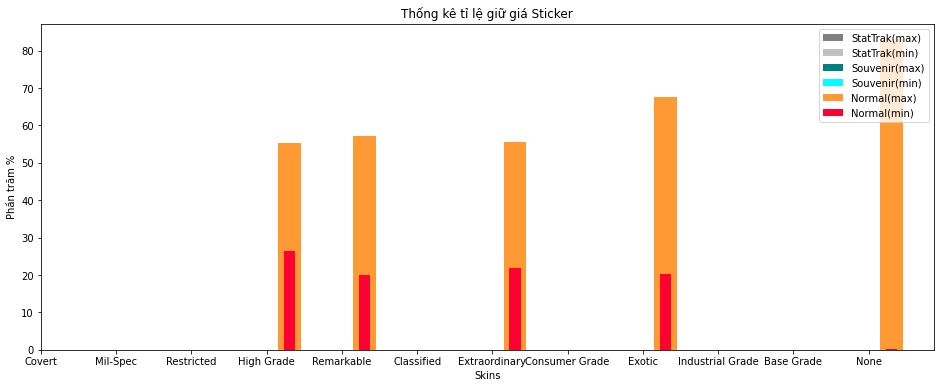

In [18]:
find_price('Sticker')

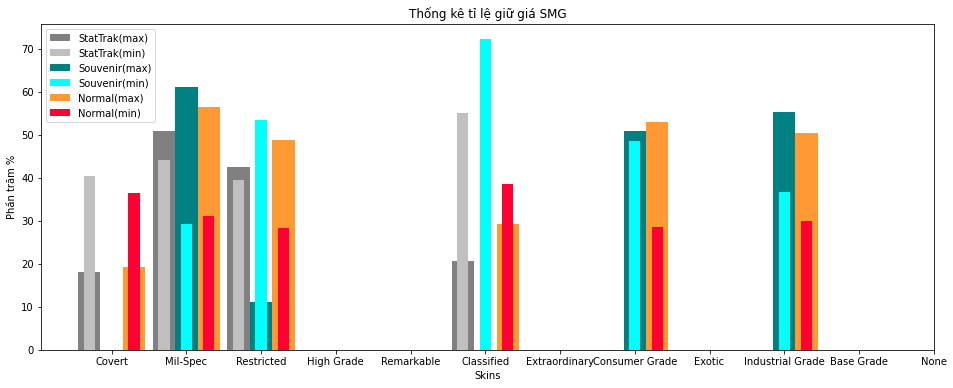

In [19]:
find_price('SMG')

#### Nhận xét : 
Biểu đồ thống kê phần trăm (%) giá của các skin với các độ hiếm và Extra khác nhau 

Tùy vào Type , Rarity , Extra sẽ có tỉ lệ phần trăm khác nhau 

Biểu đồ thể hiện % Reach max và Reach min phản ảnh mức độ giữ giá của của skin , qua đó thể hiện giá trị của skin đối với thị trường 